1. Problem:

In this analysis, we use Titanic dataset and try to understand what features contribute to the survival of the passenger. We build models with the training set and forecast whether the person survived or not in the test dataset.

Credit: 
- Titanic Project Example by KEN JEE
- Titanic Data Science Solutions by MANAV SEHGAL

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Acquire data

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

combine = [titanic_df, test_df]

3. Check dataset:

Before building the models, we want to explore the data, identify patterns and analyse the features to prepare for data cleansing.

a. Data description:

- there are 11 columns/features in the dataset and we want to predict 'Survived' as the outcome.
- categorical features include: Survived, Sex, Embarked, Pclass
- numerical features: Age, Fare, SibSp, Parch
- mixed features: Ticket, Cabin

In [3]:
titanic_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.25,NaN,Q
741,742,0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.85,C46,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.50,NaN,S


In [4]:
titanic_df.shape

(891, 12)

Errors/typos/missing values:

- in the training set, there are 177 missing values in 'Age' feature, and 687 missing values in 'Cabin' and 2 missings in Embarked.
- in the test dataset, there are 86 missing values in Age, 1 in Fare, and 327 in Cabin.

In [5]:
missing_val_count_by_column = (titanic_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column>0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [6]:
missing_val_count_by_column_test = (test_df.isnull().sum())
print(missing_val_count_by_column_test[missing_val_count_by_column_test>0])

Age       86
Fare       1
Cabin    327
dtype: int64


In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Distribution of numerical features
- Age, Fare, SibSp, Parch
- average age of passengers is younger than 30 (29.70), with the oldest being 80
- the number of sibling or spouse that travelled together with passengers range from 0 to 8. And the maximum parents/chirldren travelled together was 6.
- the average fare was 32, whereas the maximum fare is 512. Big difference.

In [11]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Distribution of categorical features 
Survived, Sex, Embarked, Pclass
- on average, 38% of the people in the sample survived
- out of 891 people in the sample, 577 are male
- passengers embarked on 3 ports, with 644 of them on port S
- there are 3 classes on the ship
- there are many unique cabin and ticket

In [12]:
titanic_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Shorney, Mr. Charles Joseph",male,347082,B96 B98,S
freq,1,577,7,4,644


Assumptions based on prelimnary data anlysis:

completing
- missing values in Age, Cabin, Embarked

correcting
- Cabin may be dropped as there are many missing values 
- Ticket may not be dropped
- may drop Name or create Title from Name

correlating
- numerical features and outcome (Survived)
- among categorical features
- between categorical and numerical features 

converting
- convert categorical features into dummy variables

creating
- new features 'Alone' for the passengers who did not travel with siblings, parents or children. Along=1 means not travelling with anyone.
- band Age into groups
- band fare into groups


Next, we are going to group the data and visualise the data to exam the assumptions above and also to investigate what features should be put in the models.

b. Check data distribution with grouping and pivoting

First, we want to check the distribution of survivial rate among the features that do not have missing values. In this case, we are going to have a look at Pclass, Sex, SibSp, and Parch.

We find that Pclass, gender, SibSp and Parch all have impact on the survival rate.

In [13]:
titanic_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
titanic_df.pivot_table(index='Survived', columns=['Sex'], values='Pclass', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [15]:
titanic_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
titanic_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
titanic_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


c. Visualising data

For numerical features, we can plot histograms to spot the patterns. We find that:
- Children younger than 4-year-old had a high survival rate
- many passengers between 16-30 did not survive
- older passengers (in their 80) survived

Age feature should be considered in the model building, and we need to 
- complete the missing values
- band age into groups

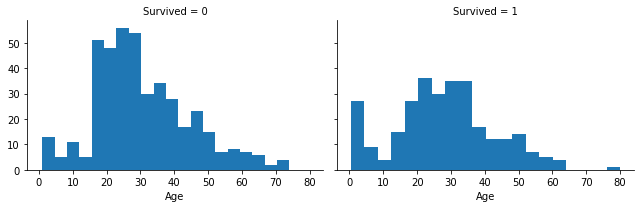

In [18]:
# Age

g = sns.FacetGrid(titanic_df, col='Survived', height=3, aspect=1.5)
g.map(plt.hist, 'Age', bins=20);


The survival rate is much higher in Pclass 1 then that in Pclass 2 and 3. There is not a strong correlation between survival and Pclass in conjection with age.

Pclass should be considered in the model.

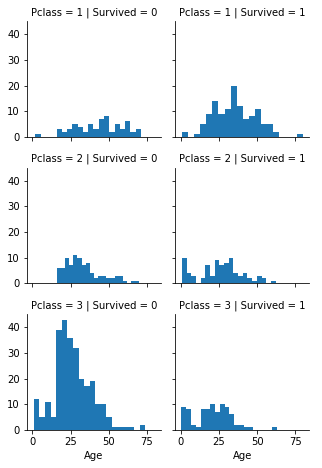

In [16]:
# Pclass and Age

g = sns.FacetGrid(titanic_df, col='Survived', row='Pclass', height=2.2, aspect=1)
g.map(plt.hist, 'Age', bins=20)
g.add_legend();

Female had higher chance of survival who boarded at S and Q. Male had various survival rate for different embarking ports.

- We should consider Embark in the model and need to fill the missing values.
- Sex should be included in the model.

C:\Users\qianz\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\qianz\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


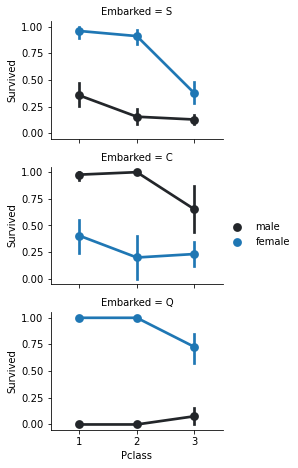

In [19]:
# Sex, Embarked and Age

g = sns.FacetGrid(titanic_df, row='Embarked', height=2.2, aspect=1.5)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
g.add_legend();

In [20]:
titanic_df.pivot_table(index=['Embarked', 'Sex'], columns=['Pclass'], values='Name',aggfunc='count')

Pclass            1   2    3
Embarked Sex                
C        female  43   7   23
         male    42  10   43
Q        female   1   2   33
         male     1   1   39
S        female  48  67   88
         male    79  97  265

Embarked at the same port, and/or same gender, passengers who paid higher fare had higher survival rate. Should consider banding fare groups into categories and then create dummies.

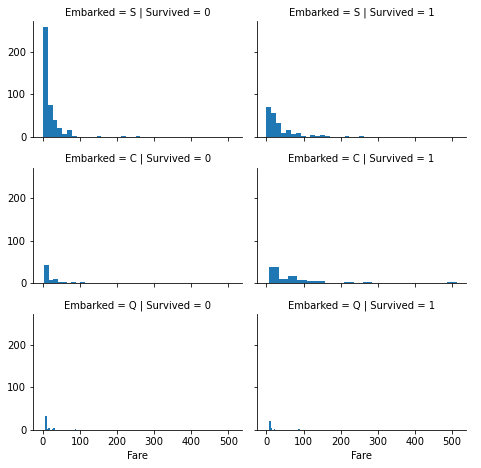

In [21]:
# Fare

g = sns.FacetGrid(titanic_df, row='Embarked', col='Survived', height=2.2, aspect=1.5)
g.map(plt.hist,'Fare', bins=20)
g.add_legend();

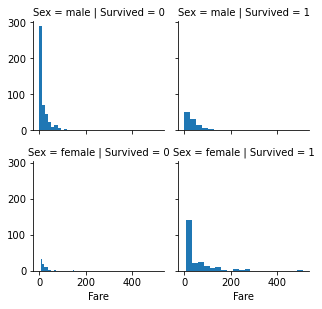

In [22]:
# Pclass and Age

g = sns.FacetGrid(titanic_df, col='Survived', row='Sex', height=2.2, aspect=1)
g.map(plt.hist, 'Fare', bins=20)
g.add_legend();

4. Cleansing and prepare the data

In [23]:
# new ideas to try:
# different ways  to impute missing values and compare the MAE of random forest
    # Age/Embarked: mean, median is current way, create missing value dummy
    # Cabin: create missing value dummy, drop


In [24]:
# dropping variables

titanic_df.drop(columns=['Ticket','Cabin'], inplace=True)
test_df.drop(columns=['Ticket','Cabin'], inplace=True)

combine = [titanic_df, test_df]

titanic_df.shape, test_df.shape

((891, 10), (418, 9))

In [25]:
# complete the missing values in Embarked

mode_port = titanic_df.Embarked.dropna().mode()[0]

for df in combine:
    df['Embarked'] = df['Embarked'].fillna(mode_port)
    
titanic_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [26]:
# complete missing values in Age

for d in combine:
    d['Sex'] = d['Sex'].map({'female':1, 'male':0}).astype(int)
    
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",0,4.0,4,2,31.275,S
583,584,0,1,"Ross, Mr. John Hugo",0,36.0,0,0,40.125,C
462,463,0,1,"Gee, Mr. Arthur H",0,47.0,0,0,38.500,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",0,64.0,0,0,26.000,S
619,620,0,2,"Gavey, Mr. Lawrence",0,26.0,0,0,10.500,S


In [27]:
# complete the missing values in age with the median age of the specific Age and Pclass.

guess_ages = np.zeros((2,3))

for d in combine:
    for i in range(0,2):
        for j in range(1,4):
            guess_df = d[(d['Sex']==i) & (d['Pclass']==j)]['Age'].dropna()
            age_guess = round(guess_df.median(),2)
            guess_ages[i,j-1] = int(age_guess)
    
    for i in range(0,2):
        for j in range(1,4):
            d.loc[(d['Age'].isnull()) & (d['Sex']==i) & (d['Pclass']==j), 'Age'] = guess_ages[i,j-1]
            
# titanic_df.sample(5)

In [28]:
# create age bands

titanic_df['AgeBand'] = pd.cut(titanic_df['Age'],5)
titanic_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
3,"(48.168, 64.084]",0.434783
2,"(32.252, 48.168]",0.412844
1,"(16.336, 32.252]",0.336714
4,"(64.084, 80.0]",0.090909


In [29]:
for d in combine:
   
    d.loc[d['Age'] <= 16, 'Age'] = 0
    d.loc[(d.Age > 16) & (d.Age <= 32),'Age'] = 1
    d.loc[(d.Age > 32) & (d.Age <= 48),'Age'] = 2
    d.loc[(d.Age > 48) & (d.Age <= 64),'Age'] = 3
    d.loc[(d.Age > 64) & (d.Age <= 80),'Age'] = 4


In [30]:
titanic_df.drop(columns='AgeBand', inplace=True)

In [31]:
# create LowSibSp (SibSp>3) and LowParch (Parch>3)

for d in combine:
    d['LowSibSp'] = np.where(d['SibSp'] <= 3, 1, 0)
    d['LowParch'] = np.where(d['Parch'] <= 3, 1, 0)

In [32]:
for d in combine:
    d.drop(columns=['SibSp','Parch'], inplace=True)

In [33]:
# complete one missing value of Fare in test dataset

test_df.Fare = test_df.Fare.fillna(titanic_df.Fare.mode()[0])

In [34]:
# create Fare band 

titanic_df['FareBand'] = pd.cut(titanic_df['Fare'],4)
titanic_df[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareBand,Survived
3,"(384.247, 512.329]",1.000000
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
0,"(-0.512, 128.082]",0.368113


In [35]:
for d in combine:
    
    d.loc[d.Fare <= 128, 'Fareband'] = 0
    d.loc[(d.Fare > 128) & (d.Fare <= 256),'Fareband'] = 1
    d.loc[(d.Fare > 256) & (d.Fare <= 384),'Fareband'] = 2
    d.loc[(d.Fare > 384),'Fareband'] = 3

In [36]:
titanic_df.drop(columns='FareBand', inplace=True)

In [37]:
for d in combine:
    d.drop(columns=['Fare'], inplace=True)

Next, we need to convert categorical features into dummy variables. This is important because without doing so we are assuming a linear relationship between each band. For example, passengers paid fare where it is in fareband 4 had exactly 4 times the affect that those who paid fare within fareband 1 had, both compared to passengers in fareband 0. This is a wild assumption. To avoid this, we are going to create multiple dummies and drop one dummy for each feature to avoid multicollinearity.


In [38]:
# create dummy variables for categorical features
# Embarked

titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])


In [39]:
for d in combine:
    d.drop(columns=['Embarked'], inplace=True)

In [40]:
# Pclass

titanic_df = pd.get_dummies(titanic_df, columns=['Pclass'])
test_df = pd.get_dummies(test_df, columns=['Pclass'])

for d in combine:
    d.drop(columns=['Pclass'],inplace=True)


In [41]:
# Fare

titanic_df = pd.get_dummies(titanic_df, columns=['Fareband'])
test_df = pd.get_dummies(test_df, columns=['Fareband'])

for d in combine:
    d.drop(columns=['Fareband'],inplace=True)

In [42]:
# Age

titanic_df = pd.get_dummies(titanic_df, columns=['Age'])
test_df = pd.get_dummies(test_df, columns=['Age'])

for d in combine:
    d.drop(columns=['Age'],inplace=True)


In [43]:
titanic_df.drop(columns=['Embarked_S','Pclass_3', 'Fareband_0.0', 'Age_4.0'], inplace=True)
test_df.drop(columns=['Embarked_S','Pclass_3','Fareband_0.0','Age_4.0'], inplace=True)

In [46]:
# creating Alone feature for who travelled alone

# titanic_df['Alone'] = np.where(titanic_df['SibSp']+titanic_df['Parch']>0, 1, 0)
# titanic_df['Alone'].value_counts()

In [47]:
# Cabin
# titanic_df['Deck'] = titanic_df['Cabin'].dropna()
# titanic_df['Deck'] = titanic_df['Deck'].str[0]
# titanic_df.sample(5)

In [48]:
# sns.catplot(x='Deck', data=titanic_df, kind='count', palette='winter', hue='Survived');

5. Model building

This is a supervised machine learning model because the data is labelled in the training set as survived or not. We also wants to use classification or regression model. To satisfy these requirements, we are going to build our model using the following models. Before building the model, we just need to have a final touch on our data.

In [49]:
X_train = titanic_df.drop(columns=['PassengerId','Survived','Name'])
Y_train = titanic_df['Survived']
X_test = test_df.drop(columns=['PassengerId','Name'])

X_train.shape, Y_train.shape, X_test.shape


((891, 14), (891,), (418, 14))

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

We start the model selection with logistic regression. It is a regression where the dependent variable is binary and we implement first to validate our assumptions and decisions for features.

The initial logit model gives us 81.145% of the accuracy, which is not bad for the first trial.

In [51]:
# logistic regression

log = LogisticRegression()
log.fit(X_train, Y_train)
Y_pred = log.predict(X_test)
acc_log = round(log.score(X_train, Y_train)*100,3)
acc_log

81.145

We break down the explanation power of each feature and find out:
- A female passenger younger than 16-year-old travelled with fewer than 3 siblings (and/or spouse), fewer than 3 parents and children, in 1st class had the highest survival rate amongest all.

- The most positive coefficient is gender. Female had 11 times more odds for survival the tragedy.

In [52]:
# show coefficient of each feature

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df['Coefficient'] = pd.Series(log.coef_[0])

coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
0,Sex,2.522427
5,Pclass_1,2.026273
1,LowSibSp,1.580271
10,Age_0.0,1.511324
6,Pclass_2,1.079436
2,LowParch,1.044889
9,Fareband_3.0,0.739138
3,Embarked_C,0.440470
11,Age_1.0,0.409884
4,Embarked_Q,0.378808


Second model we are going to build is Support Vector Machines. It is suitable in this case because it is used for supervised learning to classify data into two categories (survived or not).

In [53]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.83

Next, K-Nearest Neighbors algorithm. It is a non-parametric method used for classifying data to the k-nearest neighbor.

KNN score is the same as SVM, higher than logit model.

In [54]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.83

Gaussian Naive Bayes is based on strong independent assumption between features. The accuracy is the lowest so far.

In [55]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

63.75

Next algorithm is Perceptron, a method for supervised classification using linear function. 

In [60]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

74.97

Linear SVC

In [56]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.47

Stochastic Gradient Descent

In [62]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.92

Next, Decision Tree. This gives us the highest score so far.

In [57]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

83.28

Random Forest

In [58]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

83.28

We sort the model by the accuracy score. Random forest and Decision Tree have the same highest score of 83.28%.

In [63]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,83.280
8,Decision Tree,83.280
0,Support Vector Machines,82.830
1,KNN,82.830
2,Logistic Regression,81.145
6,Stochastic Gradient Decent,80.920
7,Linear SVC,80.470
5,Perceptron,74.970
4,Naive Bayes,63.750


In [64]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred})